In [14]:
# Importamos las librerías estándar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Descargamos los datos
url = 'https://drive.google.com/file/d/1lqdL5E3pjC0ISjsEe_F1N8xIKK8y-0nz/view?usp=sharing'
file_id = url.split('/')[-2]
download_url = 'https://drive.google.com/uc?id=' + file_id

df = pd.read_csv(download_url)

In [4]:
# Link al repo con información adicional
# https://github.com/santy-gegenschatz/CoderHouse-25570-Proyecto-Spotify

In [5]:
# Limpiamos los datos
df = df.set_index('id')
df = df.dropna()
df = df.drop_duplicates()
df.shape

(39837, 44)

In [6]:
# Describimos los datos
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,39837,38054,Greatest Hits,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_date,39837,7338,2021-09-03,189,NaN,NaN,NaN,NaN,NaN,NaN,NaN
artists,39837,24770,"Various Artists,",1592,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_tracks,39837.0,NaN,NaN,NaN,13.857796,18.835366,3.0,8.0,12.0,15.0,1190.0
t_name0,39837,34878,Intro,1045,NaN,NaN,NaN,NaN,NaN,NaN,NaN
t_name1,39837,36158,Remembered Meetings,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
t_name2,39837,36350,Time,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
t_dur0,39837.0,NaN,NaN,NaN,213221.532721,139486.047759,1485.0,147792.0,200026.0,251666.0,4449616.0
t_dur1,39837.0,NaN,NaN,NaN,222159.833471,128179.878397,4120.0,166335.0,207826.0,254302.0,7054236.0
t_dur2,39837.0,NaN,NaN,NaN,221847.772498,117355.183524,4285.0,166053.0,208538.0,256040.0,4520334.0


In [7]:
# Antes de hacer el análisis, vamos a hacer una variable que promedie cada una de las 3 variables diferentes por álbum
df['average_duration'] = ( df['t_dur0'] + df['t_dur1'] + df['t_dur2'] ) / 3
df['average_dance'] = ( df['t_dance0'] + df['t_dance1'] + df['t_dance2'] ) / 3
df['average_energy'] = ( df['t_energy0'] + df['t_energy1'] + df['t_energy2'] ) / 3
df['average_mode'] = ( df['t_mode0'] + df['t_mode1'] + df['t_mode2'] ) / 3
df['average_speech'] = ( df['t_speech0'] + df['t_speech1'] + df['t_speech2'] ) / 3
df['average_acous'] = ( df['t_acous0'] + df['t_acous1'] + df['t_acous2'] ) / 3
df['average_ins'] = ( df['t_ins0'] + df['t_ins1'] + df['t_ins2'] ) / 3
df['average_live'] = ( df['t_live0'] + df['t_live1'] + df['t_live2'] ) / 3
df['average_val'] = ( df['t_val0'] + df['t_val1'] + df['t_val2'] ) / 3
df['average_tempo'] = ( df['t_tempo0'] + df['t_tempo1'] + df['t_tempo2'] ) / 3
df['average_sig'] = ( df['t_sig0'] + df['t_sig1'] + df['t_sig2'] ) / 3

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_tracks,39837.0,13.857796,18.835366,3.000000,8.000000,12.000000,15.000000,1.190000e+03
t_dur0,39837.0,213221.532721,139486.047759,1485.000000,147792.000000,200026.000000,251666.000000,4.449616e+06
t_dur1,39837.0,222159.833471,128179.878397,4120.000000,166335.000000,207826.000000,254302.000000,7.054236e+06
t_dur2,39837.0,221847.772498,117355.183524,4285.000000,166053.000000,208538.000000,256040.000000,4.520334e+06
t_dance0,39837.0,0.569091,0.190296,0.000000,0.447000,0.591000,0.713000,9.880000e-01
t_dance1,39837.0,0.591304,0.184816,0.000000,0.476000,0.614000,0.729000,9.920000e-01
t_dance2,39837.0,0.591431,0.184972,0.000000,0.475000,0.614000,0.731000,9.820000e-01
t_energy0,39837.0,0.588915,0.254084,0.000000,0.413000,0.619000,0.797000,1.000000e+00
t_energy1,39837.0,0.605467,0.248591,0.000000,0.445000,0.638000,0.806000,1.000000e+00
t_energy2,39837.0,0.595003,0.248774,0.000000,0.429000,0.625000,0.795000,1.000000e+00


In [9]:
# Ahora hacemos un nuevo dataframe con las columnas promediadas y la columna de salida (popularity)
df2 = df[['average_duration', 'average_dance', 'average_energy', 'average_mode', 'average_speech', 'average_acous', 'average_live', 'average_val', 'average_tempo', 'average_sig', 'popularity']].copy()

In [10]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
average_duration,39837.0,219076.379563,109679.542284,8759.666667,167026.333333,205177.333333,248097.666667,3.678824e+06
average_dance,39837.0,0.583942,0.160861,0.000000,0.485333,0.604000,0.702667,9.733333e-01
average_energy,39837.0,0.596462,0.223027,0.000000,0.461333,0.624333,0.763667,1.000000e+00
average_mode,39837.0,0.617290,0.315055,0.000000,0.333333,0.666667,1.000000,1.000000e+00
average_speech,39837.0,0.121725,0.126113,0.000000,0.043200,0.067600,0.155367,9.650000e-01
average_acous,39837.0,0.322427,0.287263,0.000000,0.077243,0.246067,0.504333,9.960000e-01
average_live,39837.0,0.201299,0.129410,0.000000,0.115333,0.165333,0.240333,9.876667e-01
average_val,39837.0,0.477989,0.214907,0.000000,0.324000,0.478000,0.633000,9.846667e-01
average_tempo,39837.0,120.178086,20.062597,0.000000,106.645667,120.322667,133.349667,2.049747e+02
average_sig,39837.0,3.886805,0.322021,0.000000,4.000000,4.000000,4.000000,5.000000e+00


In [42]:
249+1.5*79

367.5

In [ ]:
# Hacemos un boxplot para verificar outliers

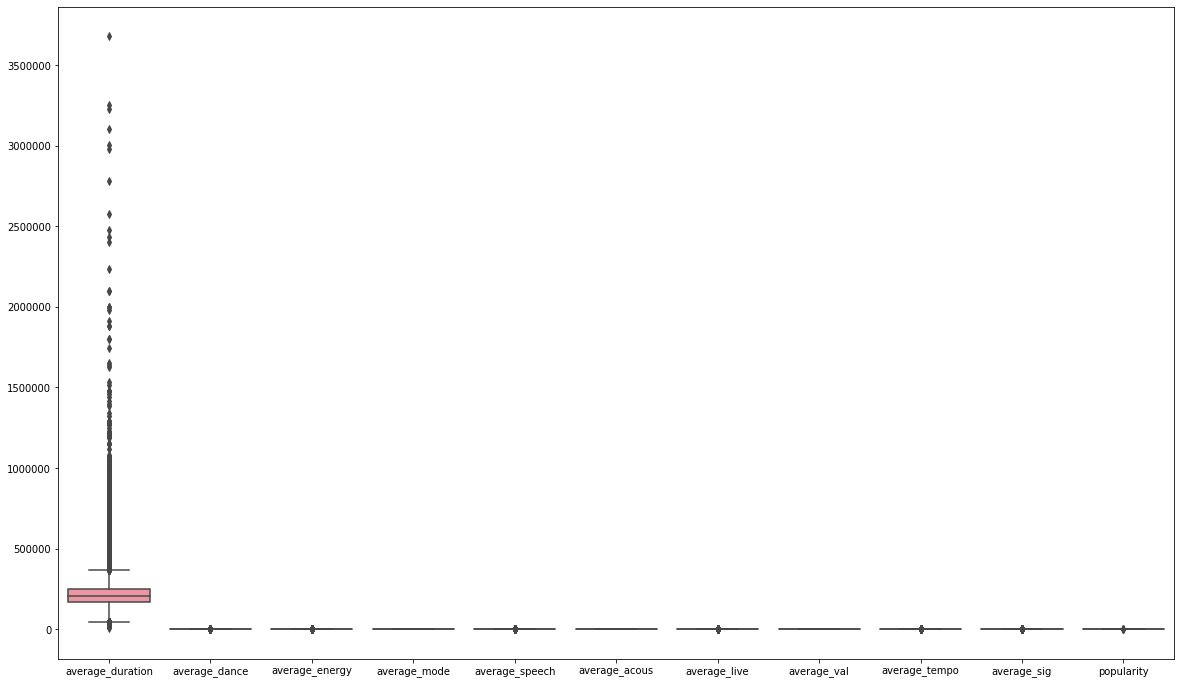

In [40]:
plt.figure(figsize = (20,12))
sns.boxplot(data = df2)

#### Observamos muchos outliers en la categoría duration

In [43]:
# Los removemos
def removerOutlier(value):
    if (value <400000):
        return value
    else:
        return np.nan

In [47]:
(df2.isna().sum)

<bound method NDFrame._add_numeric_operations.<locals>.sum of         average_duration  average_dance  average_energy  average_mode  \
id                                                                      
0                  False          False           False         False   
1                  False          False           False         False   
2                  False          False           False         False   
3                  False          False           False         False   
4                  False          False           False         False   
...                  ...            ...             ...           ...   
159965             False          False           False         False   
159971             False          False           False         False   
159972             False          False           False         False   
159973             False          False           False         False   
159976             False          False           False       

In [44]:

df2['average_duration'].apply(lambda x : removerOutlier(x))
df(df2.isna().sum)

<bound method NDFrame._add_numeric_operations.<locals>.sum of         average_duration  average_dance  average_energy  average_mode  \
id                                                                      
0                  False          False           False         False   
1                  False          False           False         False   
2                  False          False           False         False   
3                  False          False           False         False   
4                  False          False           False         False   
...                  ...            ...             ...           ...   
159965             False          False           False         False   
159971             False          False           False         False   
159972             False          False           False         False   
159973             False          False           False         False   
159976             False          False           False       

TypeError: 'DataFrame' object is not callable

In [11]:
df2.head()

,average_duration,average_dance,average_energy,average_mode,average_speech,average_acous,average_live,average_val,average_tempo,average_sig,popularity
id,,,,,,,,,,,
0,192284.000000,0.536667,0.458667,0.666667,0.048967,0.490333,0.091233,0.779000,133.243333,3.333333,51
1,195199.666667,0.779000,0.658333,0.000000,0.202100,0.109367,0.114333,0.413333,139.028000,4.000000,67
2,154768.333333,0.555000,0.487000,0.666667,0.272667,0.240847,0.286733,0.521333,122.268667,4.000000,81
3,203866.333333,0.628333,0.585000,1.000000,0.027467,0.333333,0.203333,0.556333,114.783333,4.000000,53
4,140693.000000,0.638000,0.302333,1.000000,0.071500,0.711333,0.270667,0.533000,116.460000,4.000000,70


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39837 entries, 0 to 159976
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   average_duration  39837 non-null  float64
 1   average_dance     39837 non-null  float64
 2   average_energy    39837 non-null  float64
 3   average_mode      39837 non-null  float64
 4   average_speech    39837 non-null  float64
 5   average_acous     39837 non-null  float64
 6   average_live      39837 non-null  float64
 7   average_val       39837 non-null  float64
 8   average_tempo     39837 non-null  float64
 9   average_sig       39837 non-null  float64
 10  popularity        39837 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 3.6 MB


In [16]:
df2.isnull().sum()

average_duration    0
average_dance       0
average_energy      0
average_mode        0
average_speech      0
average_acous       0
average_live        0
average_val         0
average_tempo       0
average_sig         0
popularity          0
dtype: int64

In [12]:
# Verificamos que efectivamente todos los datos son numéricos
# Ahora podemos entrenar un modelo en función de todas las variables numéricas que prediga la popularidad
# Vamos a empezar entrenando un random forest

## Random Forest

In [20]:
# Primero separamos los datos en una matriz X y una matriz y
X = df2.drop(['popularity'], axis = 1)
y = df2['popularity']
print(X.shape)
print(y.shape)

(39837, 10)
(39837,)


In [28]:
# Ahora repartimos los datos en un 80% para train y un 20% para test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [29]:
X_train

,average_duration,average_dance,average_energy,average_mode,average_speech,average_acous,average_live,average_val,average_tempo,average_sig
id,,,,,,,,,,
2012,245955.333333,0.423000,0.634667,0.333333,0.033567,0.032306,0.188333,0.298000,128.541000,4.000000
67887,196902.000000,0.653667,0.783667,0.333333,0.337333,0.280333,0.344333,0.372333,115.955000,4.000000
4074,149836.000000,0.626667,0.774333,0.333333,0.056300,0.201603,0.243333,0.638667,102.180667,4.000000
20749,246853.000000,0.690333,0.856667,0.666667,0.076800,0.193600,0.235333,0.783333,117.239667,4.000000
43077,240631.666667,0.499333,0.455667,0.666667,0.068833,0.314290,0.147667,0.274000,144.693333,4.000000
...,...,...,...,...,...,...,...,...,...,...
14304,207331.333333,0.572000,0.691000,0.000000,0.042467,0.192953,0.307333,0.151733,115.309667,4.000000
31086,199679.000000,0.716333,0.660333,0.666667,0.301567,0.568333,0.095733,0.770000,143.515000,3.666667
151480,253413.000000,0.635333,0.866000,1.000000,0.040433,0.337000,0.227433,0.806333,156.666667,3.000000


In [30]:
y_train

id
2012      40
67887     30
4074      56
20749     40
43077     29
          ..
14304     20
31086     39
151480    57
1394      61
48296     38
Name: popularity, Length: 31869, dtype: int64

In [31]:
# Con los datos ya spliteados, procedemos a crear el modelo
modelo_random_forest = RandomForestRegressor(n_estimators = 50) # Usamos 50 árboles pq no quiero fundir mi compu
modelo_random_forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [32]:
y_pred = modelo_random_forest.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [33]:
X_test['y_pred'] = y_pred
X_test['y_true'] = y_test
X_test.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,average_duration,average_dance,average_energy,average_mode,average_speech,average_acous,average_live,average_val,average_tempo,average_sig,y_pred,y_true
id,,,,,,,,,,,,
72277,211253.000000,0.692667,0.763667,0.666667,0.052033,0.396000,0.359300,0.778667,105.814667,3.333333,36.24,15
4142,162755.333333,0.685667,0.839333,0.666667,0.235967,0.066790,0.399333,0.197333,105.796000,4.000000,40.88,60
129129,263777.333333,0.559667,0.538333,0.333333,0.039533,0.689667,0.138467,0.561667,104.321000,4.000000,32.14,26
35739,164480.666667,0.560667,0.781333,0.666667,0.382667,0.253667,0.319000,0.333333,117.622333,4.000000,33.06,15
10888,219537.333333,0.662000,0.891667,0.333333,0.051000,0.021917,0.170500,0.644333,137.573333,4.000000,42.50,65


In [34]:
r2_score(y_test, y_pred)

0.11110662778282443

In [36]:
# verificar características importantes
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": modelo_random_forest.feature_importances_}
).sort_values("importance", ascending=False)

# Mostrar
feature_importances_df

,feature,importance
0,average_duration,0.152241
4,average_speech,0.126205
2,average_energy,0.116936
5,average_acous,0.116066
7,average_val,0.113877
1,average_dance,0.113152
6,average_live,0.109241
8,average_tempo,0.106803
3,average_mode,0.024331
9,average_sig,0.021149


Text(0.5, 1.0, 'Gráfico de barras')

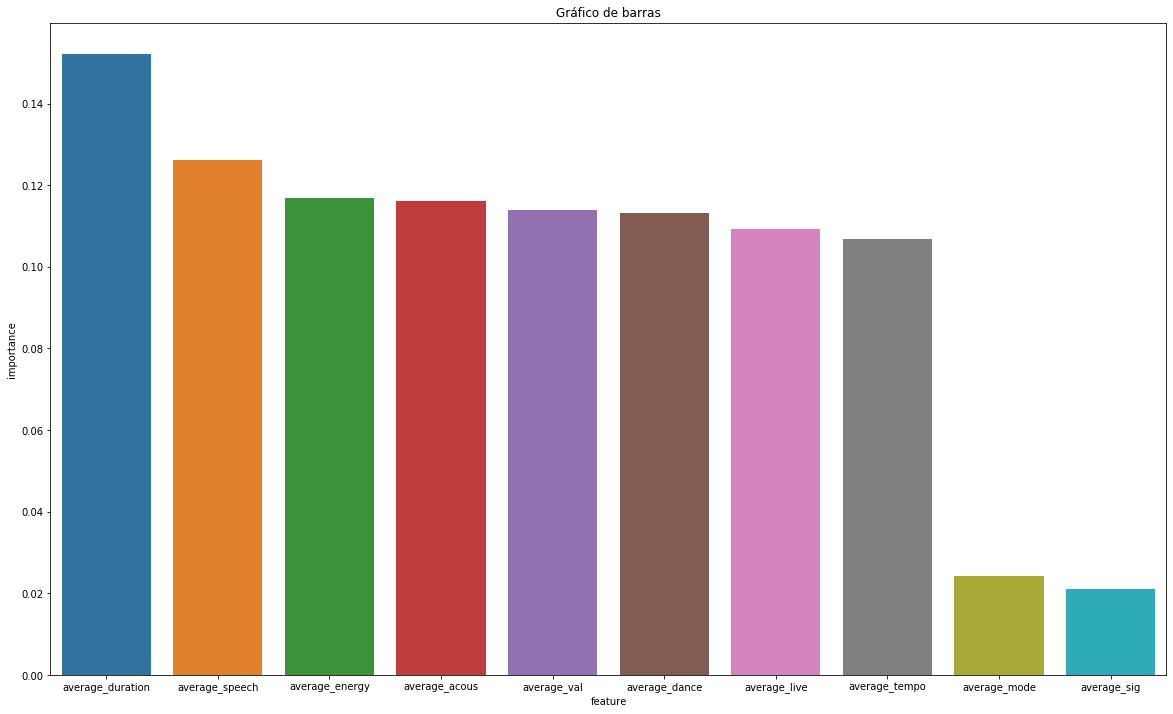

In [37]:
# Hacemos un gráfico de las features
plt.figure(figsize = (20,12))
sns.barplot(x = feature_importances_df.feature, y = feature_importances_df.importance)
plt.title('Gráfico de barras')